In [25]:
from bs4 import BeautifulSoup
import os
import random
import math

In [26]:
# read data and get text
with open("data/newstest2018-zhen-ref-ts.en.sgm") as f:
    ref = f.read()
with open("data/newstest2018-zhen-src-ts.zh.sgm") as f:
    src = f.read()
# remove continuous "\n"
ref_txt = BeautifulSoup(ref).get_text()
ref_lines = ref_txt.split("\n")
ref_txt = "\n".join([line for line in ref_lines if line != ""])
src_txt = BeautifulSoup(src).get_text()
src_lines = src_txt.split("\n")
src_txt = "\n".join([line for line in src_lines if line != ""])
# write to txt
if not os.path.exists("output"):
    os.makedirs("output")
with open("output/newstest2018-zhen-src-ts.zh.txt", "w") as f:
    f.write(src_txt)
with open("output/newstest2018-zhen-ref-ts.en.txt", "w") as f:
    f.write(ref_txt)
# randomly select 1000 sentences
ref_lines = ref_txt.split("\n")
src_lines = src_txt.split("\n")
length = len(ref_lines)
assert length == len(src_lines)
random.seed(2023)
idx = random.sample(range(length), 100)
src_selected = [src_lines[i] for i in idx]
ref_selected = [ref_lines[i] for i in idx]
src_selected = "\n".join(src_selected)
ref_selected = "\n".join(ref_selected)
print("src word count:", len(src_selected))
print("ref word count:", len(ref_selected.strip().split()))
# write to txt
with open("output/src_randomly_selected.txt", "w") as f:
    f.write(src_selected)
with open("output/ref_randomly_selected.txt", "w") as f:
    f.write(ref_selected)

src word count: 4426
ref word count: 2565


获取`output/src_randomly_selected.txt`百度/谷歌/必应中译英结果，分别保存为`baidu.txt` `google.txt` `bing.txt`

In [27]:
with open("baidu.txt") as f:
    baidu = f.read()
with open("google.txt") as f:
    google = f.read()
with open("bing.txt") as f:
    bing = f.read()

In [28]:
def get_portion(ans_list, ref_list, n):
    ref_gram = set([tuple(ref_list[i:i + n]) for i in range(len(ref_list) - n + 1)])
    cnt = sum([1 for i in range(len(ans_list) - n + 1) if tuple(ans_list[i:i + n]) in ref_gram])
    return cnt / (len(ans_list) - n + 1)

def calc_bleu(ans, ref, N=4):
    ans_list = ans.strip().split()
    ref_list = ref.strip().split()
    c = len(ans_list)
    r = len(ref_list)
    bp = min(1, math.exp(1 - r / c))
    w = 1 / N
    tot = sum([w * math.log(get_portion(ans_list, ref_list, n)) for n in range(1, N + 1)])
    return bp * math.exp(tot)

print("baidu bleu:", calc_bleu(baidu, ref_selected))
print("google bleu:", calc_bleu(google, ref_selected))
print("bing bleu:", calc_bleu(bing, ref_selected))

baidu bleu: 0.2970177719881695
google bleu: 0.34550565633825053
bing bleu: 0.33508984774718664


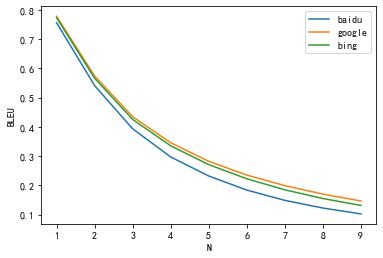

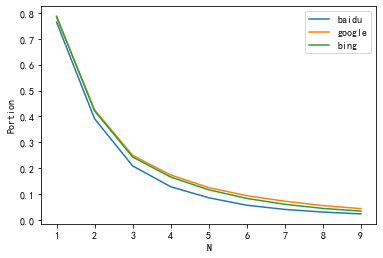

In [30]:
# modify N to plot the curve
import matplotlib.pyplot as plt

x = list(range(1, 10))
y_baidu = [calc_bleu(baidu, ref_selected, N=n) for n in x]
y_google = [calc_bleu(google, ref_selected, N=n) for n in x]
y_bing = [calc_bleu(bing, ref_selected, N=n) for n in x]
plt.plot(x, y_baidu, label="baidu")
plt.plot(x, y_google, label="google")
plt.plot(x, y_bing, label="bing")
plt.xlabel("N")
plt.ylabel("BLEU")
plt.legend()
plt.show()

x = list(range(1, 10))
p_baidu = [get_portion(baidu.strip().split(), ref_selected.strip().split(), n) for n in x]
p_google = [get_portion(google.strip().split(), ref_selected.strip().split(), n) for n in x]
p_bing = [get_portion(bing.strip().split(), ref_selected.strip().split(), n) for n in x]
plt.plot(x, p_baidu, label="baidu")
plt.plot(x, p_google, label="google")
plt.plot(x, p_bing, label="bing")
plt.xlabel("N")
plt.ylabel("Portion")
plt.legend()
plt.show()